In [3]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import *
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import *
from pymatgen.electronic_structure.core import Spin
from scipy import constants as scc
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from math import *
import numpy as np
with MPRester("7kc9QdoJwMtBxzFK") as m:
    hbar = scc.hbar
    eV = 1.60218*10**(-19)
    angstrom = 10**-10
    sq_angstrom = angstrom**2 #Constantes utiles
    m_el = 9.109*10**-31
    print("Mon matériau est le CsPrS2")
    structure = m.get_structure_by_material_id("mp-9080")
    structure.to(filename="CsPrS2.cif")
    print()
    
    bs = m.get_bandstructure_by_material_id("mp-9080")
    bssl = m.get_bandstructure_by_material_id("mp-9080",line_mode= True)
    plotter = BSPlotter(bssl)
    data = plotter.bs_plot_data()
    bg = bs.get_band_gap()
    bdg = bs.get_direct_band_gap()    #On récupère un certain nombre d'objets pour plus tard
    cbm = bs.get_cbm()
    vbm = bs.get_vbm()

Mon matériau est le CsPrS2



In [5]:
###################################################
    
    print("--- Structure générale : ---")
    print()
    print("On a ",bs.nb_bands," bandes distinctes. La dernière bande de valence est indexée : ",vbm.get("band_index").get(list(vbm.get("band_index").keys())[0]),"(nous choisissons de traiter la 15ième pour la suite), tandis que la première bande de conduction est indexée : ",cbm["band_index"].get(list(vbm.get("band_index").keys())[0]))
    print()

--- Structure générale : ---

On a  34  bandes distinctes. La dernière bande de valence est indexée :  [14, 15] (nous choisissons de traiter la 15ième pour la suite), tandis que la première bande de conduction est indexée :  [16]

On a présenté aussi le graphe général de la relation de dispersion et donc des bandes associées pour se faire une idée.



--- Bande interdite : ---

La bande interdite représente un gap d'énergie de  2.1610000000000005  eV. Ce gap est indirect ce qui signifie que les deux valeurs d'énergie associées ne peuvent jointes par un seul photon, le concours d'un phonon est nécessaire.
La bande interdite est située entre les énergies  3.68897385  et  5.8499738500000005 eV.
On a représenté sur le graphe les deux transitions nécessaires pour amener un électron de la dernière bande de valence à la première de conduction.
(Si on avait uniquement considéré le gap direct il aurait eu une valeur de  2.4828  eV.)
Le matériel est donc un semi-conducteur à gap indirect.


<Figure size 432x288 with 0 Axes>

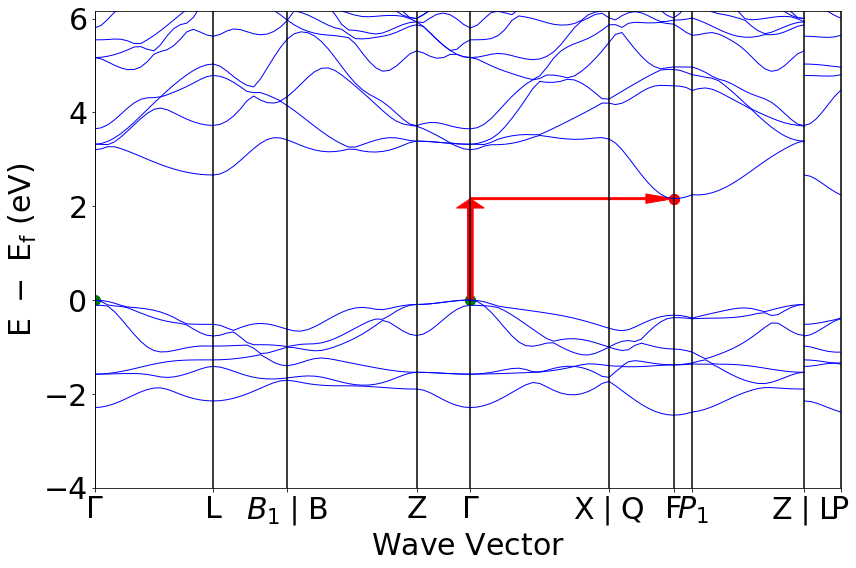

In [6]:
###################################################
    
print("--- Bande interdite : ---")
print()
print("La bande interdite représente un gap d'énergie de ",bg["energy"]," eV. Ce gap est indirect ce qui signifie que les deux valeurs d'énergie associées ne peuvent jointes par un seul photon, le concours d'un phonon est nécessaire.")
print("La bande interdite est située entre les énergies ",bs.efermi + vbm['energy']," et ",bs.efermi + cbm['energy'],"eV.")
print("On a représenté sur le graphe les deux transitions nécessaires pour amener un électron de la dernière bande de valence à la première de conduction.")
print("(Si on avait uniquement considéré le gap direct il aurait eu une valeur de ",bdg," eV.)")
print("Le matériel est donc un semi-conducteur à gap indirect.")
    
b15_4 = data.get("energy")[4].get("1")[15]#Valeurs d'énergie pour la branche 4, courbe 15 où se situe le max de la bande de valence
b16_6 = data.get("energy")[6].get("1")[16]#"            "           "        6         16       "     le min de la bande de conduction
d15_4 = data["distances"][4]#distance des points respectifs pour la branche 4
d16_6 = data["distances"][6]#"       "        "        "        "        "  6
CBMp = [d16_6[0],b16_6[0]]
VBMp = [d15_4[0],b15_4[0]]
plotter = BSPlotter(bssl)
plt.figure("0")
plotter.get_plot(vbm_cbm_marker=True)
plt.arrow(VBMp[0],VBMp[1], 0.0 ,(CBMp[1]-VBMp[1])  , ec = 'r', fc = 'r', width = 0.04, head_width = 0.2, head_length = 0.2, length_includes_head= True)
plt.arrow(VBMp[0],CBMp[1],(CBMp[0]-VBMp[0]) ,0.0 , ec = 'r', fc = 'r',width = 0.04, head_width = 0.2, head_length = 0.2, length_includes_head= True)
plt.show()
print()

--- Mesure de la dispersion : ---

La mesure de dispersion est exprimée par la pente reliant les deux points des extrémités de chaque branche.
On va donc calculer ces valeurs pour chaque branche et pour les deux bandes concernées.


On obtient donc une dispersion maximale (en eV*Angstrom) de  0.6053459407605469  et minimale de  0.19604195132836258  pour la dernière bande de valence.
La disperion maximale correspond à la branche 1, nommée Gamma-L, et la minimale à la branche 2, nommée L-B_1.
On obtient donc une dispersion maximale (en eV*Angstrom) de  2.728947433804726  et minimale de  0.0278091494208474  pour la première bande  de conduction.
La disperion maximale correspond à la branche 6, nommée Q-F, et la minimale à la branche 3, nommée B-Z.


<Figure size 432x288 with 0 Axes>

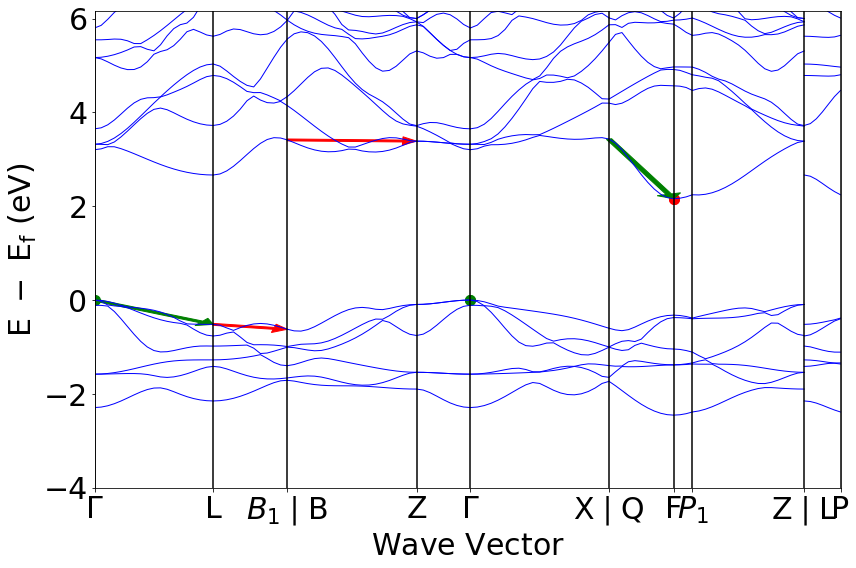

In [7]:
###################################################
    
print("--- Mesure de la dispersion : ---")
print()
print("La mesure de dispersion est exprimée par la pente reliant les deux points des extrémités de chaque branche.")
print("On va donc calculer ces valeurs pour chaque branche et pour les deux bandes concernées.")
print()
#On va construire un vecteur qui contient les pentes pour chacune des branches des courbes qui nous intéressent (15 pour VBM et 16 pour CBM)
nb_branches = np.size(data.get("energy"))

e15 = np.zeros(nb_branches)
e16 = np.zeros(nb_branches)
sl15 = np.zeros(nb_branches)
sl16 = np.zeros(nb_branches)     #Initialisation des différents tableaux

for l in range(nb_branches) :
    di = data.get("distances")[l]
    e15 = data.get("energy")[l].get('1')[15]
    e16 = data.get("energy")[l].get('1')[16]   #Mise-à-jour du tableau des énergies dans la bande l
    dist = di[-1] - di[0]
    sl15[l] = abs((e15[-1]-e15[0])/dist)
    sl16[l] = abs((e16[-1]-e16[0])/dist)     #Calcul de la pente entre deux points extrêmes
slmax15 = max(sl15)
slmax16 = max(sl16)
slmin15 = min(sl15)
slmin16 = min(sl16)

print()
print("On obtient donc une dispersion maximale (en eV*Angstrom) de ",slmax15," et minimale de ",slmin15," pour la dernière bande de valence.")
print("La disperion maximale correspond à la branche 1, nommée Gamma-L, et la minimale à la branche 2, nommée L-B_1.")
print("On obtient donc une dispersion maximale (en eV*Angstrom) de ",slmax16," et minimale de ",slmin16," pour la première bande  de conduction.")
print("La disperion maximale correspond à la branche 6, nommée Q-F, et la minimale à la branche 3, nommée B-Z.")
plotter = BSPlotter(bssl)
plt.figure("0")
plotter.get_plot(vbm_cbm_marker=True)

#Les points associés pour les flèches
x11 = data.get("distances")[0][0]
y11 = data.get("energy")[0].get('1')[15][0]
x12 = data.get("distances")[0][-1]
y12 = data.get("energy")[0].get('1')[15][-1]
x21 = data.get("distances")[1][0]
y21 = data.get("energy")[1].get('1')[15][0]
x22 = data.get("distances")[1][-1]
y22 = data.get("energy")[1].get('1')[15][-1]
x31 = data.get("distances")[5][0]
y31 = data.get("energy")[5].get('1')[16][0]
x32 = data.get("distances")[5][-1]
y32 = data.get("energy")[5].get('1')[16][-1]
x41 = data.get("distances")[2][0]
y41 = data.get("energy")[2].get('1')[16][0]
x42 = data.get("distances")[2][-1]
y42 = data.get("energy")[2].get('1')[16][-1]

plt.arrow(x11,y11,x12-x11,y12-y11, ec = 'g', fc = 'g', width = 0.04, head_width = 0.18, head_length = 0.1, length_includes_head= True)
plt.arrow(x21,y21,x22-x21,y22-y21, ec = 'r', fc = 'r', width = 0.04, head_width = 0.18, head_length = 0.1, length_includes_head= True)
plt.arrow(x31,y31,x32-x31,y32-y31, ec = 'g', fc = 'g', width = 0.04, head_width = 0.18, head_length = 0.1, length_includes_head= True)
plt.arrow(x41,y41,x42-x41,y42-y41, ec = 'r', fc = 'r', width = 0.04, head_width = 0.18, head_length = 0.1, length_includes_head= True)
plt.show()
print()

--- Masse effective : ---

Pour estimer la masse effective en un point particulier de notre diagramme, nous utilisons l'approximation par un polynôme de degré 2.
Nous allons donc fiter les paramètres a,b et c telq que : y = ax^2 + bx + c, à l'aide des deux points adjacents aux points qui nous intéressent.
On obtient donc pour a,b,c du CBM :  [  7.56566562 -63.57399196 135.70791271]
On obtient donc pour a,b,c du VBM :  [ -2.25386383  12.01756397 -16.01518723]

On rappelle la définition de la masse effective : 
(1/m*)_ij = (1/hbar^2)(d^2 epsilon)/(dk_i dk_j) on a donc ici que : (d^2 epsilon)/(dk_i dk_j) = 2a (en faisant ensuite la conversion liée à l'énergie en eV)
On obtient donc pour le minimum de la bande de conduction : m* =  4.58737098317519e-31
Pour le maximum de la bande de valence : m* =  -1.5398674285384887e-30

On peut comparer ces masses à la masse de l'électron dans le vide
Pour le min. de la bande de conduction : m*/m_el =  0.5036086269815776
Pour le max. de la bande de vale

<Figure size 432x288 with 0 Axes>

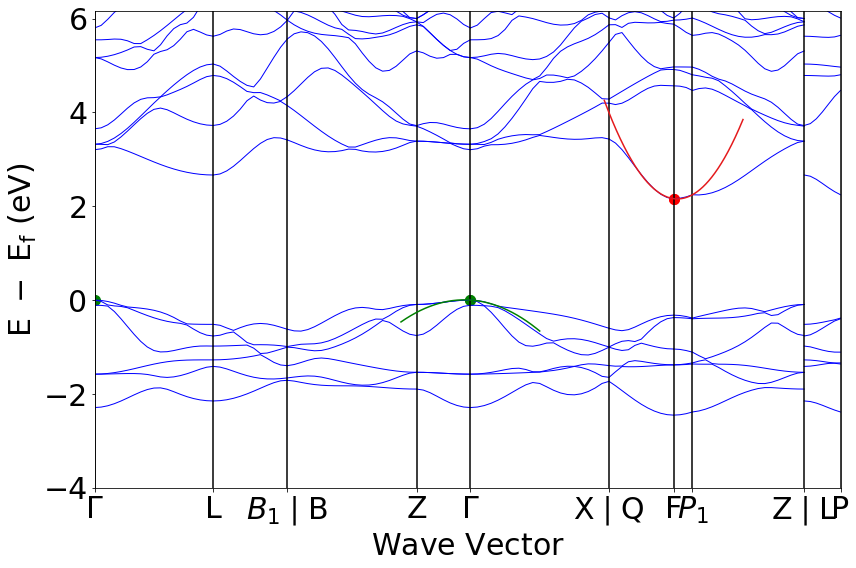

In [12]:
###################################################
    
print("--- Masse effective : ---")
print()
data = plotter.bs_plot_data()
b15_4 = data.get("energy")[4].get("1")[15]#Valeurs d'énergie pour la branche 4, courbe 15 où se situe le max de la bande de valence
b16_6 = data.get("energy")[6].get("1")[16]#"            "           "        6         16       "     le min de la bande de conduction

d15_4 = np.zeros(np.size(data["distances"][4]))
d16_6 = np.zeros(np.size(data["distances"][6]))

d15_4 = data["distances"][4]#distance des points respectifs pour la branche 4
d16_6 = data["distances"][6]#"       "        "        "        "        "  6

#On récupère les points (x,y) des maxs et mins
CBMp = [d16_6[0],b16_6[0]]
VBMp = [d15_4[0],b15_4[0]]

#On prend un point à gauche et un point à droite pour fiter les paramètres de la paraboles
#On commence par récupérer les infos des branches situées à gauche
b15_3 = data.get("energy")[3].get("1")[15]
b16_5 = data.get("energy")[5].get("1")[16]#Energies

d15_3 = data["distances"][3]
d16_5 = data["distances"][5]#Distances associées

#On choisit arbitrairement un point de chaque côté
Gp15 = [d15_3[np.size(d15_3)-5],b15_3[np.size(d15_3)-5]]
Dp15 = [d15_4[4],b15_4[4]]
Gp16 = [d16_5[np.size(d16_5)-4],b16_5[np.size(d16_5)-4]]
Dp16 = [d16_6[-1],b16_6[-1]]#On a donc choisi des points éloignés symétriquement de 4 indices

#On commence par le fit du min de conduction
x16 = [Gp16[0],CBMp[0],Dp16[0]]
y16 = [Gp16[1],CBMp[1],Dp16[1]]
result16 = np.polyfit(x16,y16,2)
xfit16 = np.linspace(CBMp[0]-0.5,CBMp[0]+0.5,1000)#Les limites horizontales des branches sont bien sûr les mêmes pour chaque courbe
yfit16 = result16[0]*xfit16**2 + result16[1]*xfit16 + result16[2]

#Ensuite le fit du max de valence
x15 = [Gp15[0],VBMp[0],Dp15[0]]
y15 = [Gp15[1],VBMp[1],Dp15[1]]
result15 = np.polyfit(x15,y15,2)
xfit15 = np.linspace(VBMp[0]-0.5,VBMp[0]+0.5,1000)#Les limites horizontales des branches sont bien sûr les mêmes pour chaque courbe
yfit15 = result15[0]*xfit15**2 + result15[1]*xfit15 + result15[2]

print("Pour estimer la masse effective en un point particulier de notre diagramme, nous utilisons l'approximation par un polynôme de degré 2.")
print("Nous allons donc fiter les paramètres a,b et c telq que : y = ax^2 + bx + c, à l'aide des deux points adjacents aux points qui nous intéressent.")
print("On obtient donc pour a,b,c du CBM : ",result16)
print("On obtient donc pour a,b,c du VBM : ",result15)
print()
print("On rappelle la définition de la masse effective : ")
print("(1/m*)_ij = (1/hbar^2)(d^2 epsilon)/(dk_i dk_j) on a donc ici que : (d^2 epsilon)/(dk_i dk_j) = 2a (en faisant ensuite la conversion liée à l'énergie en eV et aux distances en angstrom^2)")
dd2_16 = 2.0*result16[0]
dd2_15 = 2.0*result15[0]
m16 = ((1/hbar)**2*dd2_16*eV*sq_angstrom)**-1
m15 = ((1/hbar)**2*dd2_15*eV*sq_angstrom)**-1
print("On obtient donc pour le minimum de la bande de conduction : m* = ",m16)
print("Pour le maximum de la bande de valence : m* = ",m15)
print()
print("On peut comparer ces masses à la masse de l'électron dans le vide")
print("Pour le min. de la bande de conduction : m*/m_el = ",m16/m_el)
print("Pour le max. de la bande de valence :    m*/m_el = ",m15/m_el)
print()

plt.figure("1")
plotter.get_plot(vbm_cbm_marker=True)
plt.plot(xfit16,yfit16)
plt.plot(xfit15,yfit15,'g')
plt.show()